In [1]:
from imports import *

In [2]:
# Define names and filenames...

galaxy = 'ngc0628'
galaxy_cat = 'ngc628'
galaxy_hst = 'ngc628c'
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'

hstha_file = '%s/data_hstha/%s/hst_contsub/%s_hst_ha_sic.fits' %(root_dir, galaxy_hst, galaxy_hst)
muscat_file = '%s/data_hstha/%s/muse/%s_nebmask.fits' %(root_dir, galaxy_hst, galaxy.upper())
musha_file = '%s/data_hstha/%s/muse/%s-*_MAPS.fits' %(root_dir, galaxy_hst, galaxy.upper())
musha_file = glob(musha_file)[0] #because of resolution in name
cutout_dir = '%s/data_hstha_nebulae_catalogue/%s/cutouts' %(root_dir, galaxy_hst)
dendro_dir = '%s/data_hstha_nebulae_catalogue/%s/catalogue' %(root_dir, galaxy_hst)
cutouts_hdus_dir = '%s/data_hstha_nebulae_catalogue/%s/cutouts_hdus' %(root_dir, galaxy_hst)
regions_file = '%s/sample.reg' %cutout_dir
regions_pickel_file = '%s/sample.pickel' %cutout_dir
sample_table_file = '%s/data_misc/sample_table/phangs_sample_table_v1p6.fits' %root_dir
muscat_table_file = '%s/data_misc/nebulae_catalogue/Nebulae_catalogue_v3.fits' %root_dir
cluster_table_file = '%s/data_misc/multiscale_stellar_associations/%s/vselect/ws32pc/PHANGS_IR4_hst_wfc3_%s_v1p3_multi_assoc-vselect-ws32pc-main.fits' %(root_dir, galaxy_cat, galaxy_cat)
cluster_mask_file =  '%s/data_misc/multiscale_stellar_associations/%s/vselect/ws32pc/PHANGS_IR4_hst_wfc3_%s_v1p3_multi_assoc-vselect-ws32pc-idmask.fits' %(root_dir, galaxy_cat, galaxy_cat)
catalog_mask_file = '%s/%s_mask.fits' %(dendro_dir, galaxy)

for prints in [hstha_file, muscat_file, musha_file, cutout_dir, 
               cutouts_hdus_dir, regions_file, regions_pickel_file, 
               sample_table_file, muscat_table_file, cluster_table_file, 
               cluster_mask_file, catalog_mask_file]:
    print(prints)

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_hst_ha_sic.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts_hdus
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/sample.reg
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/sample.pickel
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/sample_table/phangs_sample_table_v1p6.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/nebulae_catalogue/Nebulae_catalogue_v3.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/multiscale_s

In [3]:
# Load regions, sample table and HDUs... 

hdus_cutouts  = cat_misc.load_pickle('%s/hdus_all.pickel' %cutout_dir)
regions       = cat_misc.load_pickle(regions_pickel_file)
props_all     = QTable.read('%s/props_all.fits' %dendro_dir)
props_clusters = QTable.read(cluster_table_file)
hdu_cluster_mask = fits.open(cluster_mask_file)[0]
hdu_catalog_mask = fits.open(catalog_mask_file)[0]

[INFO] [load_pickle] Load /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/hdus_all.pickel
[INFO] [load_pickle] Load /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/sample.pickel


In [4]:
# Get only regions in the props table...
region_IDs = props_all['region_ID']
for key in regions.keys():
    regions[key] = regions[key][region_IDs.astype(int).tolist()]

# Get cutouts... 
rerun_cutouts = False
if rerun_cutouts:

    hdus_cluster_mask = cat_cutouts.get_croppeddata_all(hdu_cluster_mask, regions)
    hdus_catalog_mask = cat_cutouts.get_croppeddata_all(hdu_catalog_mask, regions)

    # # Check sizes of cutouts...
    # n = len(hdus_cluster_mask)
    # for i in tqdm(range(n)):

    #     hdus_cluster_mask[i] = reproject_interp(hdus_cluster_mask[i], hdus_cutouts['hstha_hdu'][i].header, return_footprint=False, order='nearest-neighbor')
    #     hdus_catalog_mask[i] = reproject_interp(hdus_catalog_mask[i], hdus_cutouts['hstha_hdu'][i].header, return_footprint=False, order='nearest-neighbor')

    # Remove the cutouts that are not in the props_all table... 
    # region_ID_n = len(hdus_cutouts['muscat_hdu'])

    # hdus_cluster_mask_new = []
    # hdus_catalog_mask_new = []

    # for region_ID in range(region_ID_n):
    #     if region_ID in props_all['region_ID']:

    #         hdus_cluster_mask_new += [hdus_cluster_mask[region_ID]]
    #         hdus_catalog_mask_new += [hdus_catalog_mask[region_ID]]

    hdus_cluster_mask_new = hdus_cluster_mask
    hdus_catalog_mask_new = hdus_catalog_mask

    cat_misc.save_pickle(hdus_cluster_mask_new, '%s/hdus_cluster_mask_new.pickel' %cutout_dir)
    cat_misc.save_pickle(hdus_catalog_mask_new, '%s/hdus_catalog_mask_new.pickel' %cutout_dir)

else:

    hdus_cluster_mask_new = cat_misc.load_pickle('%s/hdus_cluster_mask_new.pickel' %cutout_dir)
    hdus_catalog_mask_new = cat_misc.load_pickle('%s/hdus_catalog_mask_new.pickel' %cutout_dir)

[INFO] [load_pickle] Load /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/hdus_cluster_mask_new.pickel
[INFO] [load_pickle] Load /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/hdus_catalog_mask_new.pickel


In [5]:
region_ID_all = np.unique(hdu_catalog_mask.data)

props_clusters_list = []

for i, region_ID in enumerate(props_all['region_ID']):

    hdu_catalog_mask_ = hdus_catalog_mask_new[i]
    hdu_cluster_mask_ = hdus_cluster_mask_new[i]

    mask = hdu_catalog_mask_.data == region_ID

    data_cluster_masked = hdu_cluster_mask_.data[mask]

    cluster_IDs = np.unique(data_cluster_masked)
    cluster_IDs = cluster_IDs[cluster_IDs != 0]

    # If no cluster, continue...
    if len(cluster_IDs) == 0: 
        continue

    # Only one cluster needs to be selected...
    if len(cluster_IDs) == 1: 
        multiple_clusters = False

        mask = props_clusters['reg_id'] == cluster_IDs[0]
        props_clusters_ = props_clusters[mask]

        props_clusters_['reg_dolflux_Age_MinChiSq_ave'] = np.nan
        props_clusters_['reg_dolflux_Mass_MinChiSq_sum'] = np.nan
        

    # If more than one cluster, select the one with the minimum age...
    else: 
        multiple_clusters = True

        ages = []
        masses = []
        ages_ave = []
        masses_sum = []

        for cluster_ID in cluster_IDs: 
            mask = props_clusters['reg_id'] == cluster_ID
            ages += [props_clusters['reg_dolflux_Age_MinChiSq'][mask][0]]
            masses += [props_clusters['reg_dolflux_Mass_MinChiSq'][mask][0]]

        argmin = np.argmin(ages) # Get minimum age cluster
        ages_ave = np.mean(ages) # Get mean mass of clusters
        masses_sum = np.sum(masses) # Get sum of masses of clusters
        ages_massweighted = np.sum(np.array(masses) * np.array(ages)) / np.sum(masses) # Calculate the mass-weighted age

        mask = props_clusters['reg_id'] == cluster_IDs[argmin]
        props_clusters_ = props_clusters[mask]

        props_clusters_['reg_dolflux_Age_MinChiSq_ave'] = ages_ave
        props_clusters_['reg_dolflux_Mass_MinChiSq_sum'] = masses_sum
        props_clusters_['reg_dolflux_Age_MinChiSq_massweighted'] = ages_massweighted
    
    props_clusters_['multiple_clusters'] = multiple_clusters
    props_clusters_['region_ID'] = region_ID
    props_clusters_list += [props_clusters_]

props_clusters_masked = vstack(props_clusters_list)
props_all_cluster = join(props_all, props_clusters_masked, keys='region_ID')

In [6]:
# Only take non-masked values in table
props_all_cluster_masked = props_all_cluster[~props_all_cluster.mask['reg_dolflux_Ebv_MinChiSq']]
props_all_cluster_masked.write('%s/props_all_cluster.fits' %dendro_dir, overwrite=True)

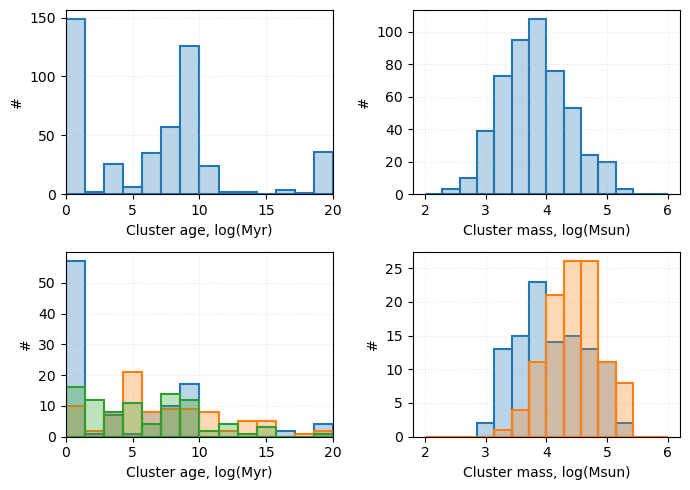

In [7]:
mask = props_all_cluster_masked['multiple_clusters'] == True

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(7,5))

bins = np.linspace(0,20,15)
ax1.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq'], alpha=0.3, fc='C0', bins=bins)
ax1.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq'], fc='none', ec='C0', lw=1.5, bins=bins)

ax3.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq'][mask], alpha=0.3, fc='C0', bins=bins)
ax3.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq'][mask], fc='none', ec='C0', lw=1.5, bins=bins)
ax3.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq_ave'][mask], alpha=0.3, fc='C1', bins=bins)
ax3.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq_ave'][mask], fc='none', ec='C1', lw=1.5, bins=bins)
ax3.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq_massweighted'][mask], alpha=0.3, fc='C2', bins=bins)
ax3.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq_massweighted'][mask], fc='none', ec='C2', lw=1.5, bins=bins)

bins = np.linspace(2,6,15)
ax2.hist(np.log10(props_all_cluster_masked['reg_dolflux_Mass_MinChiSq']), alpha=0.3, fc='C0', bins=bins)
ax2.hist(np.log10(props_all_cluster_masked['reg_dolflux_Mass_MinChiSq']), fc='none', ec='C0', lw=1.5, bins=bins)

ax4.hist(np.log10(props_all_cluster_masked['reg_dolflux_Mass_MinChiSq'][mask]), alpha=0.3, fc='C0', bins=bins)
ax4.hist(np.log10(props_all_cluster_masked['reg_dolflux_Mass_MinChiSq'][mask]), fc='none', ec='C0', lw=1.5, bins=bins)
ax4.hist(np.log10(props_all_cluster_masked['reg_dolflux_Mass_MinChiSq_sum'][mask]), alpha=0.3, fc='C1', bins=bins)
ax4.hist(np.log10(props_all_cluster_masked['reg_dolflux_Mass_MinChiSq_sum'][mask]), fc='none', ec='C1', lw=1.5, bins=bins)


for ax in [ax1, ax3]:
    ax.set_ylabel('#')
    ax.set_xlabel('Cluster age, log(Myr)')
    ax.grid(alpha=0.3, linestyle=':')
    ax.set_xlim(0,20)

for ax in [ax2, ax4]:

    ax.set_ylabel('#')
    ax.set_xlabel('Cluster mass, log(Msun)')
    ax.grid(alpha=0.3, linestyle=':')

fig.tight_layout()